# Source
https://peterroelants.github.io/posts/multivariate-normal-primer/

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

In [3]:
def univariate_normal_pdf(x, mean, variance):
    """Probability density function of the univariate normal distribution """
    
    return 1.0 / np.sqrt(2 * np.pi * variance) * np.exp( - (x - mean) ** 2 / (2 * variance))

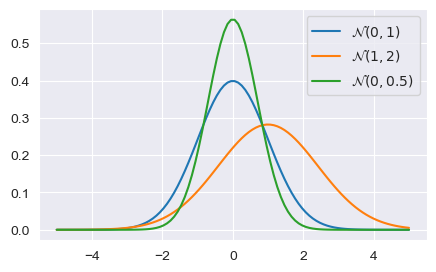

In [9]:
x = np.linspace(-5, 5, num=100)

fig = plt.figure(figsize=(5, 3))
plt.plot(x, univariate_normal_pdf(x, mean=0, variance=1), label='$\mathcal{N}(0, 1)$')
plt.plot(x, univariate_normal_pdf(x, mean=1, variance=2), label='$\mathcal{N}(1, 2)$')
plt.plot(x, univariate_normal_pdf(x, mean=0, variance=0.5), label='$\mathcal{N}(0, 0.5)$')
plt.legend()

In [3]:
def multivariate_normal_pdf(x, d, mean, covariance):
    x_m = x - mean

    return 1.0 / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance)) * \
        np.exp(- 1.0 / 2.0 * np.dot(np.dot(x_m.T, np.linalg.inv(covariance)), x_m))

In [12]:
bivariate_mean = np.array([[0.], [0]])
bivariate_covariance = np.array([
    [1., 0.],
    [0., 1.]
])

multivariate_normal_pdf(np.array([[1.0], [1.0]]), 2, bivariate_mean, bivariate_covariance)

array([[0.05854983]])

(2, 1)

Text(0.5, 1.0, 'Correlated variables')

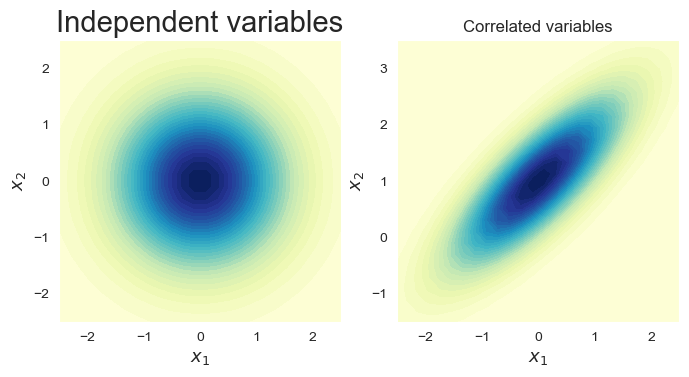

In [21]:
# plot bivariate normal distribution
def generate_surface(mean, covariance, d):
    """ function to generate density surface """
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s)  # generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))  # a matrix

    # calculate the density for each x1 and x2
    # iterate x1 first on same x2
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i, j] = multivariate_normal_pdf(
                np.array([[x1[i,j]], [x2[i,j]]]), d, mean, covariance
            )
    
    return x1, x2, pdf

# subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2

# plot independent normals
bivariate_mean = np.array([[0.0], [0.0]])
bivariate_covariance = np.array([
    [1., 0.],
    [0., 1.]
])
x1, x2, p = generate_surface(bivariate_mean, bivariate_covariance, d)
# plot bivariate distribution
con = ax[0].contourf(x1, x2, p, 33, cmap='YlGnBu')
ax[0].set_xlabel('$x_1$', fontsize=13)
ax[0].set_ylabel('$x_2$', fontsize=13)
ax[0].axis([-2.5, 2.5, -2.5, 2.5])
ax[0].set_aspect('equal')
ax[0].set_title('Independent variables', fontsize=21)

# correlated normals
bivariate_mean = np.array([[0.], [1.]])  # Mean
bivariate_covariance = np.array([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax[1].contourf(x1, x2, p, 33, cmap='YlGnBu')
ax[1].set_xlabel('$x_1$', fontsize=13)
ax[1].set_ylabel('$x_2$', fontsize=13)
ax[1].axis([-2.5, 2.5, -1.5, 3.5])
ax[1].set_aspect('equal')
ax[1].set_title('Correlated variables', fontsize=12)

# Sampling from a multivariate model
Affine transformations of the multivariate model

In [22]:
# sample X from normal distribution with u=\vec{0} and identity matrix
# transform to Y = LX + \mu

d = 2
mean = np.array([[0.], [1.]])
covariance = np.array([
    [1., 0.8],
    [0.8, 1.]
])

#
L = np.linalg.cholesky(covariance)

# sample X from standard normal
n = 50
X = np.random.normal(size=(d, n))
Y = L.dot(X) + mean

Text(0, 0.5, 'density: $p(y_1, y_2)$')

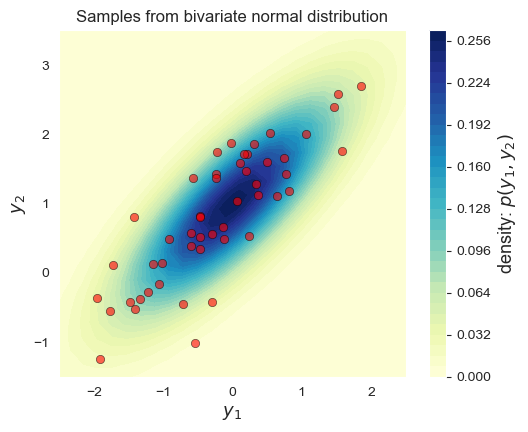

In [26]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 33, cmap='YlGnBu')
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)

In [ ]:
# Marginal